# Análise dos dados brutos de Viagens_2025

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
df = pd.read_csv(
    "dados_brutos.csv",
    sep=";",
    encoding="latin1"
)

In [4]:
top_destinos = df['Destinos'].value_counts().head(15).reset_index()
top_destinos.columns = ['Cidade/UF', 'Qtd_Viagens']

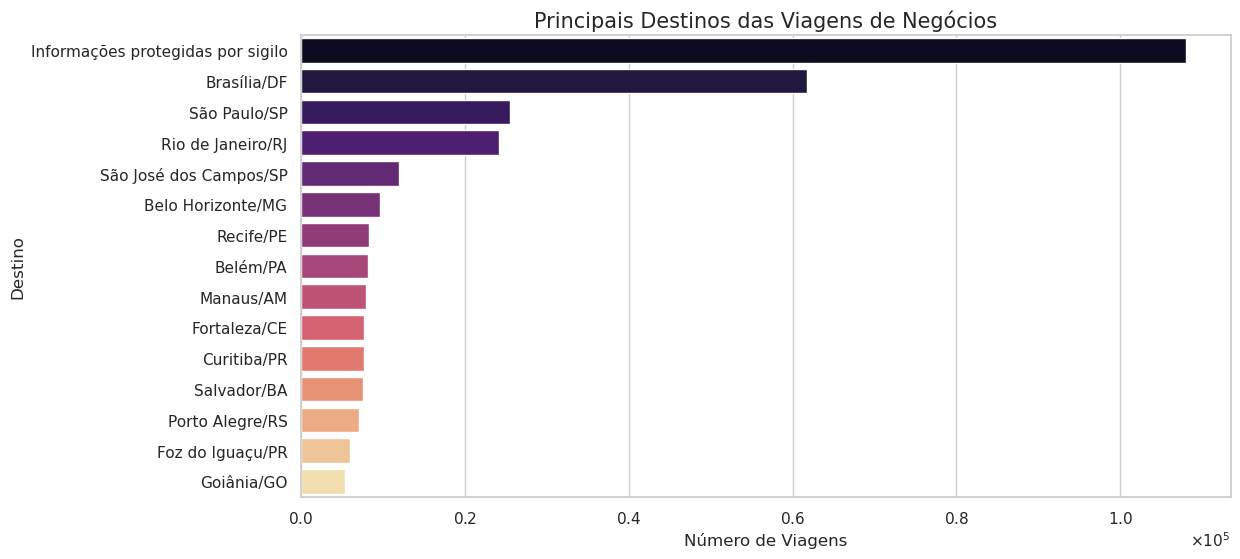

In [5]:
ax = sns.barplot(
    data=top_destinos, 
    x='Qtd_Viagens', 
    y='Cidade/UF', 
    hue='Cidade/UF', 
    palette='magma', 
    legend=False
)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))  

ax.xaxis.set_major_formatter(formatter)

plt.title('Principais Destinos das Viagens de Negócios', fontsize=15)
plt.xlabel('Número de Viagens', fontsize=12)
plt.ylabel('Destino', fontsize=12)
plt.show()

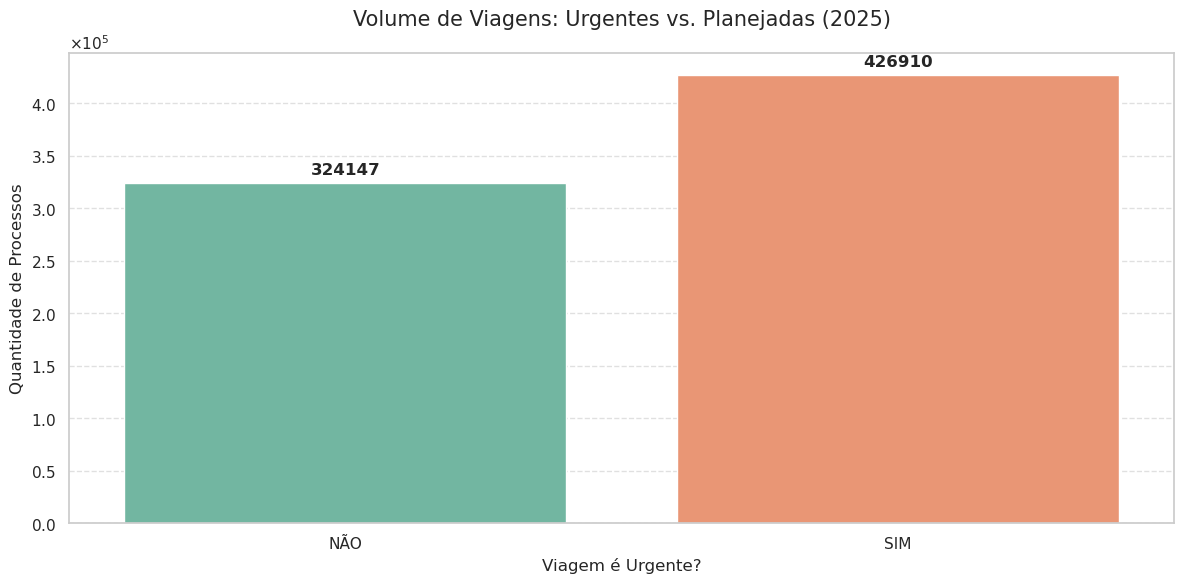

In [6]:
ax = sns.countplot(
    data=df, 
    x='Viagem Urgente', 
    hue='Viagem Urgente',
    palette='Set2', 
    legend=False
)
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points', 
        fontweight='bold',
        fontsize=12
    )
    
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))

ax.yaxis.set_major_formatter(formatter)

plt.title('Volume de Viagens: Urgentes vs. Planejadas (2025)', fontsize=15, pad=20)
plt.xlabel('Viagem é Urgente?', fontsize=12)
plt.ylabel('Quantidade de Processos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [7]:
top_funcoes = df['Descrição Função'].value_counts().head(10).reset_index()
top_funcoes.columns = ['Função', 'Quantidade']


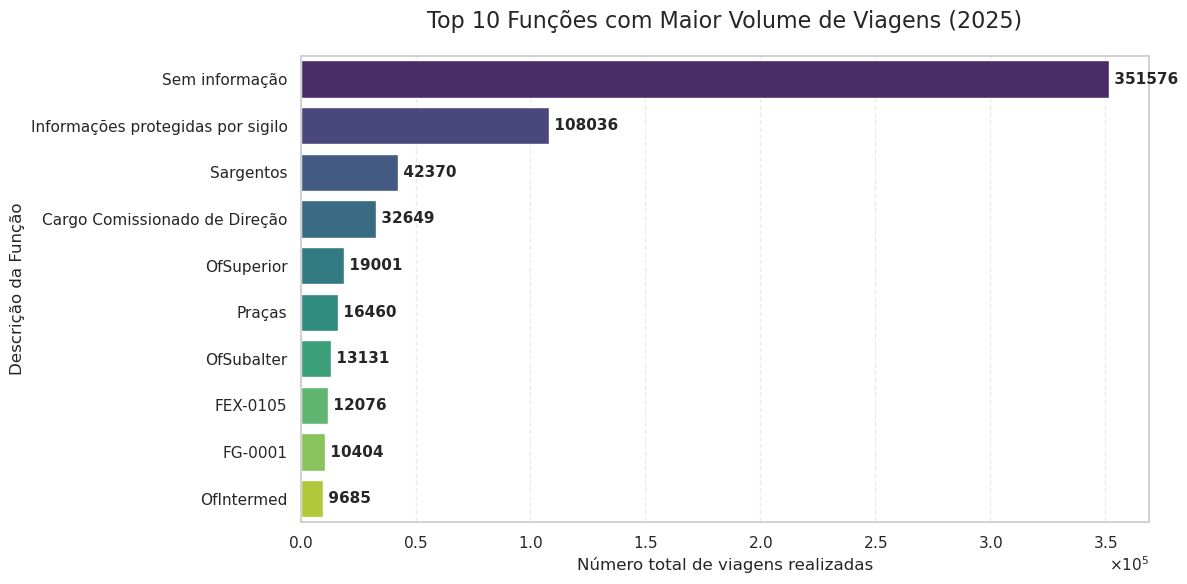

In [8]:
ax = sns.barplot(
    data=top_funcoes, 
    x='Quantidade', 
    y='Função', 
    hue='Função',
    palette='viridis', 
    legend=False
)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))  

ax.xaxis.set_major_formatter(formatter)

for index, value in enumerate(top_funcoes['Quantidade']):
    plt.text(value, index, f' {int(value)}', va='center', fontsize=11, fontweight='bold')

plt.title('Top 10 Funções com Maior Volume de Viagens (2025)', fontsize=16, pad=20)
plt.xlabel('Número total de viagens realizadas', fontsize=12)
plt.ylabel('Descrição da Função', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [9]:
top_orgaos = df['Nome órgão solicitante'].value_counts().nlargest(10).index
top_cargos = df['Descrição Função'].value_counts().nlargest(10).index

In [10]:
df_cruzado = df[df['Nome órgão solicitante'].isin(top_orgaos) & 
                df['Descrição Função'].isin(top_cargos)]


In [11]:
matriz_viagens = df_cruzado.groupby(['Nome órgão solicitante', 'Descrição Função']).size().unstack(fill_value=0)


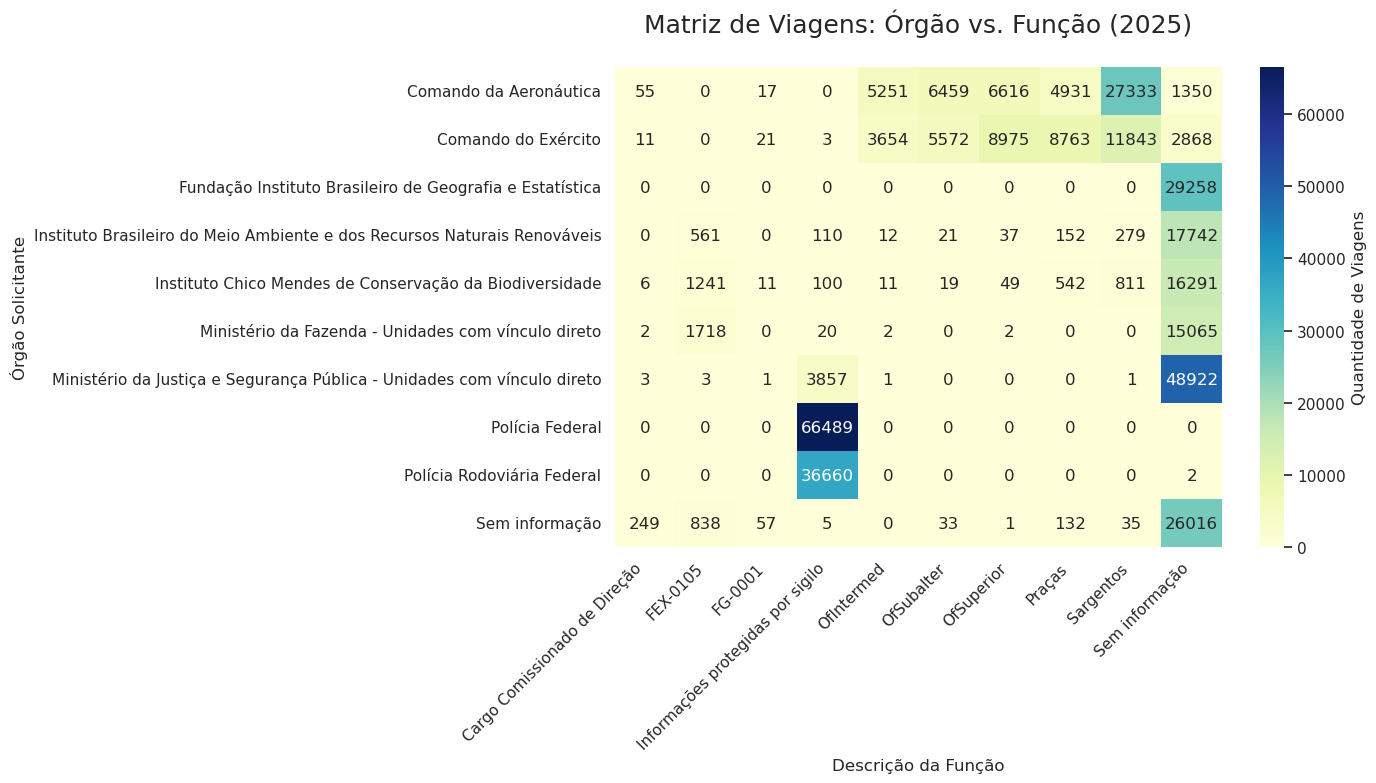

In [12]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    matriz_viagens,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    cbar_kws={'label': 'Quantidade de Viagens'}
)
plt.title('Matriz de Viagens: Órgão vs. Função (2025)', fontsize=18, pad=25)
plt.xlabel('Descrição da Função', fontsize=12)
plt.ylabel('Órgão Solicitante', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

RELATÓRIO – FUNÇÃO = -1
Total de registros-----------------------: 751,057
Função = -1 (Função Não Informada)-------: 351,576
Outras funções---------------------------: 399,481


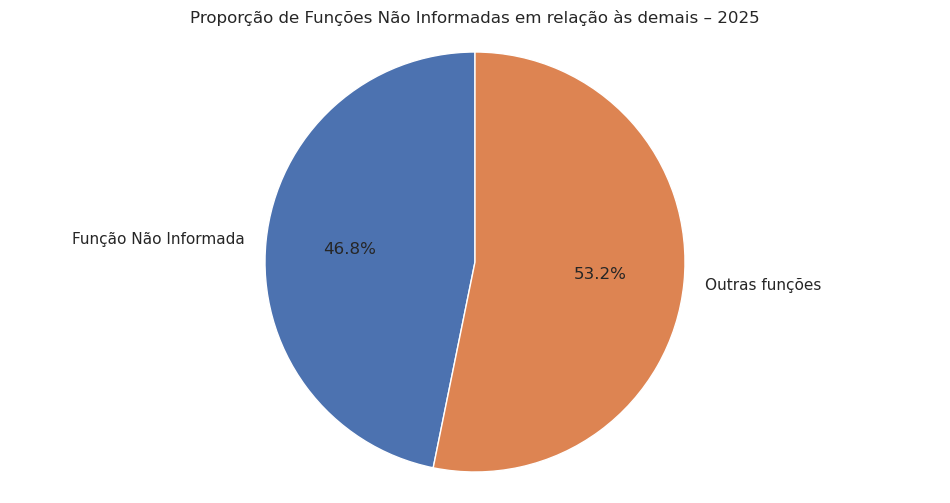

In [13]:
funcao = df['Função']
total_linhas = len(df)
qtd_funcao_menos_um = (funcao == '-1').sum()
qtd_outras_funcoes = total_linhas - qtd_funcao_menos_um

print("RELATÓRIO – FUNÇÃO = -1")
print(f"Total de registros-----------------------: {total_linhas:,}")
print(f"Função = -1 (Função Não Informada)-------: {qtd_funcao_menos_um:,}")
print(f"Outras funções---------------------------: {qtd_outras_funcoes:,}")

# Gráfico de pizza
labels = ['Função Não Informada', 'Outras funções']
sizes = [qtd_funcao_menos_um, qtd_outras_funcoes]

plt.figure()
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Proporção de Funções Não Informadas em relação às demais – 2025')
plt.axis('equal')
plt.show()


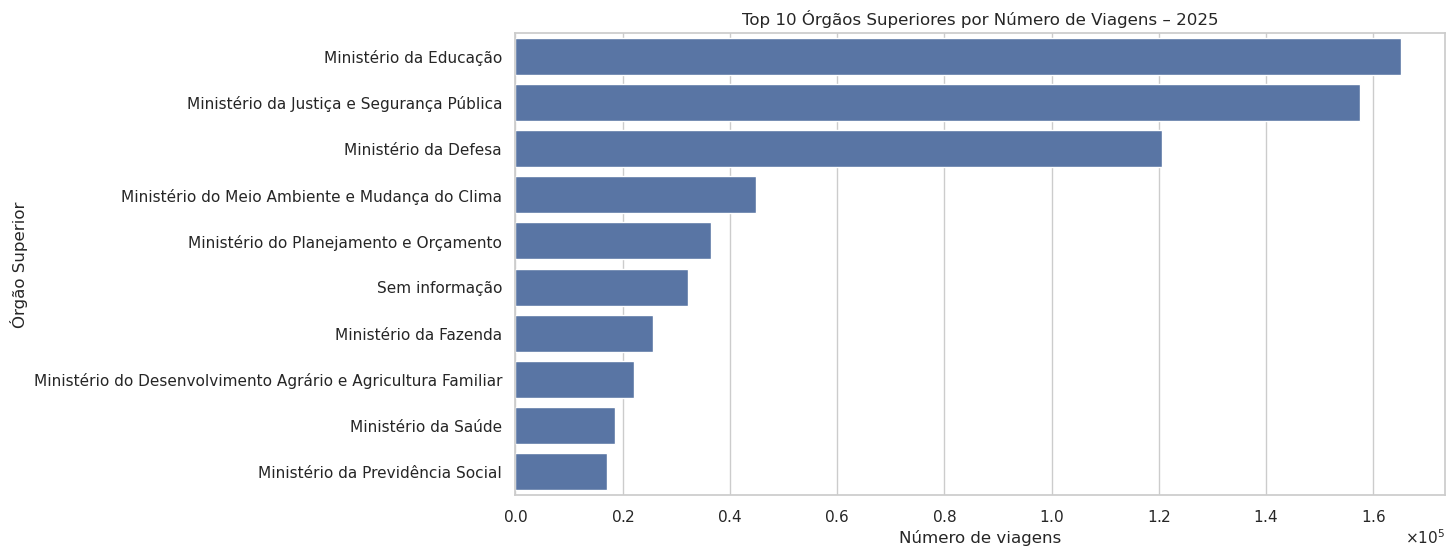

In [14]:
orgao_superior = df['Nome órgão solicitante']

viagens_por_orgao = (
    df['Nome do órgão superior']
    .value_counts()
    .reset_index()
)

viagens_por_orgao.columns = ['Órgão Superior', 'Número de Viagens']

top_10 = viagens_por_orgao.head(10)

ax = sns.barplot(
    data=top_10,
    y='Órgão Superior',
    x='Número de Viagens'
)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))

ax.xaxis.set_major_formatter(formatter)

plt.title('Top 10 Órgãos Superiores por Número de Viagens – 2025')
plt.xlabel('Número de viagens')
plt.ylabel('Órgão Superior')
plt.show()

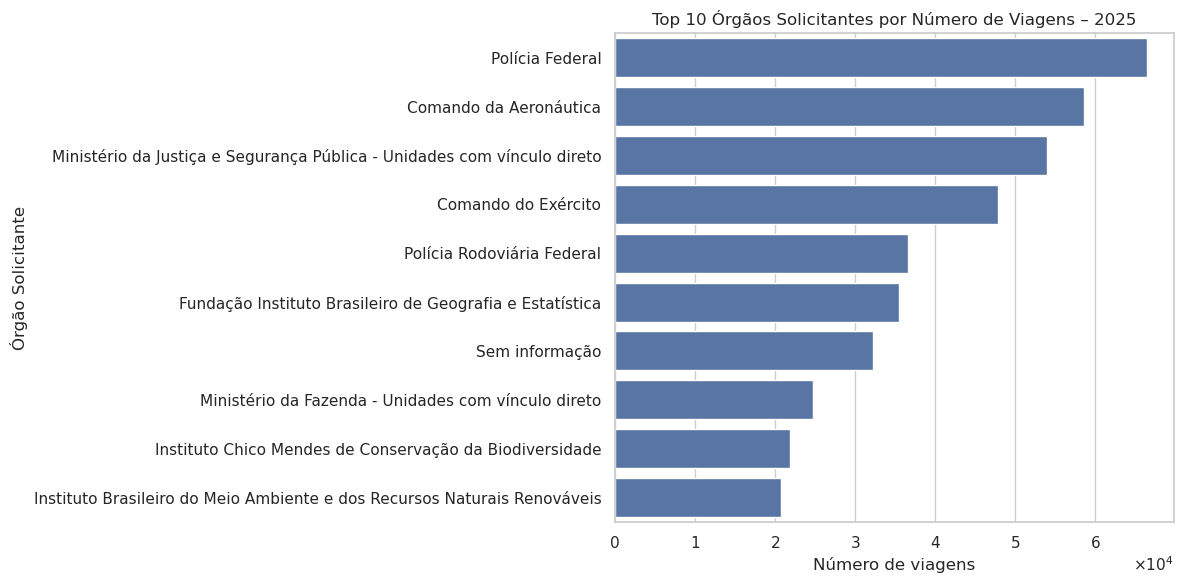

In [15]:
viagens_por_orgao_sol = (
    df['Nome órgão solicitante']
    .value_counts()
    .reset_index()
)

viagens_por_orgao_sol.columns = ['Órgão Solicitante', 'Número de Viagens']

top_10 = viagens_por_orgao_sol.head(10)

ax = sns.barplot(
    data=top_10,
    y='Órgão Solicitante',
    x='Número de Viagens'
)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
ax.xaxis.set_major_formatter(formatter)

plt.title('Top 10 Órgãos Solicitantes por Número de Viagens – 2025')
plt.xlabel('Número de viagens')
plt.ylabel('Órgão Solicitante')
plt.tight_layout()
plt.show()